In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('loan_data.csv')
print(df.head())

print(df.info())

   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0   

Column meaning:

* policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise
* purpose: purpose of the loan
* int.rate: rate of interest, 11% will be stored as 0.11
* installment: EMI
* log.annual.inc: log of self-reported annual income of the borrower
* dti: date to income ratio of the borrower (date/annual income)
* fico: fico score
* days.with.cr.line: Number of days the borrower has a credit line
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card     billing cycle)
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available)
* inq_last_6mths: The borrower’s number of inquiries by creditors in the last 6 months.
* delinq_2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
*pub_rec: The borrower’s number of derogatory public records.
*not_fully_paid: indicates whether the loan was not paid back in full (the borrower either defaulted or the borrower was deemed unlikely to pay it back)

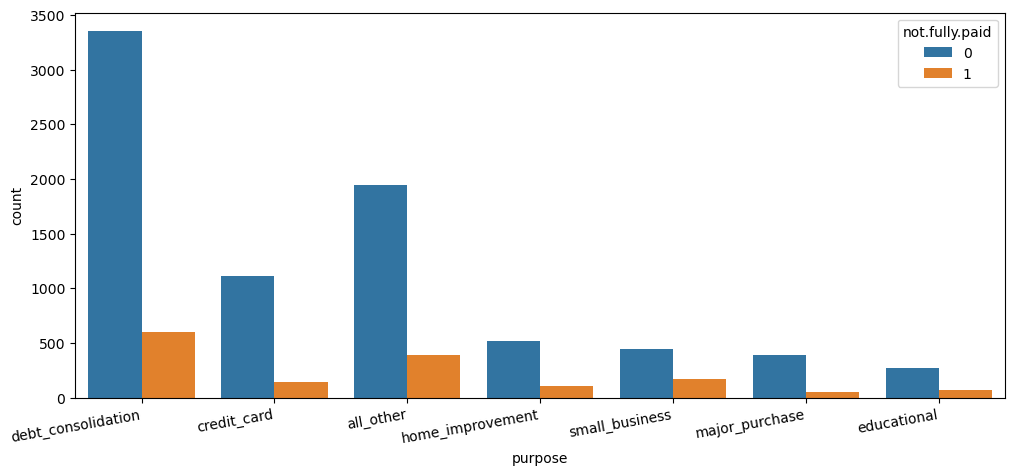

In [4]:
# Developing a model to predict the customers who have not fully paid the loan. 
#Let’s explore the purpose and target column by using seaborn’s countplot
# Countplot shows the counts of observations in each categorical bin using bars.

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 5)) # Set plot dimensions
sns.countplot(data=df,x='purpose',hue='not.fully.paid', ax=ax)
plt.xticks(rotation=10, ha='right');
plt.show()

In [5]:
# Our dataset is an imbalance that will affect the performance of the model

'''
We will now convert the ‘purpose’ column from categorical to integer using pandas `get_dummies` function. Called 'one-hot encoding' method.
The pd.get_dummies() function creates a new DataFrame with binary columns for each unique value in the specified column(s).
In this case, it creates new columns for each unique value in the 'purpose' column.
The drop_first=True argument drops the first resulting category.
See slides for more details.
'''
pre_df = pd.get_dummies(df,columns=['purpose'],drop_first=True)
print(pre_df.head())


   credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  purpose_credit_card  purpose_debt_consolidation  \
0        0               0     

* we will define feature (X) and target (y) variables, and split the dataset into training and testing sets. 
* X: This represents the features or independent variables that will be used to make predictions. You've dropped the column labeled 'not.fully.paid' from your DataFrame pre_df, so X contains all the other columns.

* y: This represents the target variable or dependent variable that you want to predict. In this case, it appears that you are trying to predict the 'not.fully.paid' variable.

* test_size=0.33: This parameter specifies the proportion of the data that will be used for testing. In this case, you've chosen to allocate 33% of the data to the testing set, and the remaining 67% will be used for training.

* random_state=125: This parameter sets a seed for the random number generator, ensuring that the data split is reproducible. The same random seed will produce the same train-test split every time you run the code.

In [6]:
from sklearn.model_selection import train_test_split

X = pre_df.drop('not.fully.paid', axis=1)
y = pre_df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)


We will be training a model on a training dataset using default hyperparameters. 
This code imports the Gaussian Naive Bayes algorithm from the scikit-learn library using the from sklearn.naive_bayes import GaussianNB statement.
Gaussian Naive Bayes is suitable for datasets with continuous numerical features.
Then, a new instance of the GaussianNB model is created using the model = GaussianNB() statement.
model.fit(X_train, y_train): This line of code trains the Gaussian Naive Bayes model on your training data (X_train and y_train). It means that the model will learn the underlying patterns and relationships between the features (independent variables) in X_train and the target variable y_train.
This trains the model on the given data.
Overall, this code sets up and trains a Gaussian Naive Bayes model on the provided training data.

In [7]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train);

We will use accuracy and f1 score to determine model performance
This code imports several functions from the sklearn.metrics module, including accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, and classification_report.
These functions are used to evaluate the performance of a machine learning model.
The code then uses the predict method of a model object to generate predictions for a set of test data X_test.
These predictions are stored in the y_pred variable.
Next, the code calculates the accuracy and F1 score of the model's predictions using the accuracy_score and f1_score functions, respectively.
The accuracy_score function compares the predicted labels in y_pred to the true labels in y_test and returns the fraction of correct predictions.
The f1_score function calculates the F1 score, which is a weighted average of precision and recall.
Finally, the code prints the accuracy and F1 score to the console using the print function.

In [8]:

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.8206263840556786
F1 Score: 0.8686606980013266


Due to the imbalanced nature of the data, we can see that the confusion matrix tells a different story. We have 486 values in the False Positive area.
This code snippet is used to create a confusion matrix plot for a binary classification problem.
First, a list of labels is defined as "Fully Paid" and "Not fully Paid".
Then, the confusion matrix is calculated using the confusion_matrix() function, which takes in the true labels (y_test) and predicted labels (y_pred) as inputs.
Next, a ConfusionMatrixDisplay object is created, which takes in the confusion matrix and the list of labels as inputs.
Finally, the plot() method is called on the ConfusionMatrixDisplay object to display the confusion matrix plot.

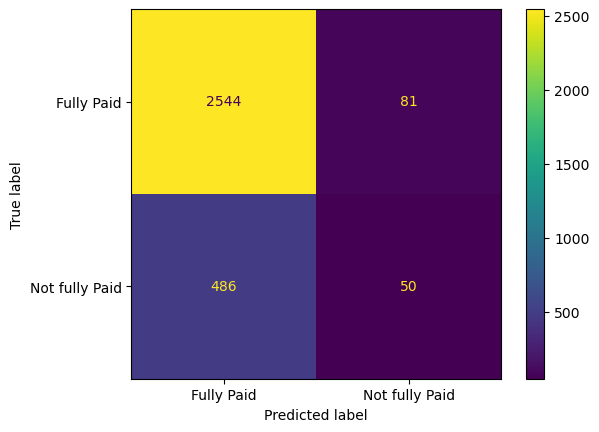

In [13]:
labels = ["Fully Paid", "Not fully Paid"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();
plt.show()